In [2]:
!pip install psycopg2-binary sqlalchemy pandas
# psycopg2-binary → PostgreSQL connector
#SQLAlchemy → clean engine-based connection
#pandas → read SQL queries easily


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    database="Banking",
    user="pratim12",
    password="Pratim@123"
)

cur = conn.cursor()
cur.execute("SELECT COUNT(*) FROM banking_clients_temp;")
print(cur.fetchone())


(2999,)


In [15]:
import pandas as pd

df = pd.read_sql("SELECT * FROM banking_clients_temp;", conn)
df.head()

C:\Users\prati\AppData\Local\Temp\ipykernel_12712\707011941.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM banking_clients_temp;", conn)


,Client ID,name,age,Location ID,Joined Bank,Banking Contact,nationality,occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,brid,genderid,iaid
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [16]:
df.describe()

,age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,brid,genderid,iaid
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2.999000e+03,2.999000e+03,2.999000e+03,2.999000e+03,2999.000000,2.999000e+03,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,51.034678,21560.511837,171270.664005,25531.124722,1.463821,3175.848319,5.913614e+05,6.714092e+05,3.210371e+05,2.328445e+05,29877.684932,8.664395e+05,1.518506,2.249416,2.558853,1.503835,10.426142
std,19.856191,12463.399892,111938.641055,16262.641530,0.676447,2497.433864,4.576313e+05,6.457716e+05,2.821100e+05,2.300195e+05,23111.559898,6.410971e+05,1.102294,1.131370,1.007537,0.500069,5.989077
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10801.000000,82886.740000,12513.050000,1.000000,1236.020000,2.395231e+05,2.043499e+05,1.198941e+05,7.477480e+04,11915.115000,3.747499e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21128.000000,142307.110000,22356.400000,1.000000,2560.730000,4.797115e+05,4.630325e+05,2.427485e+05,1.639796e+05,24320.830000,7.111817e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32056.000000,242015.770000,35465.880000,2.000000,4523.275000,8.259927e+05,9.420807e+05,4.347870e+05,3.149202e+05,41948.935000,1.184814e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.head(5)


,Client ID,name,age,Location ID,Joined Bank,Banking Contact,nationality,occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,brid,genderid,iaid
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 2999 non-null   object 
 1   name                      2999 non-null   object 
 2   age                       2999 non-null   int64  
 3   Location ID               2999 non-null   int64  
 4   Joined Bank               2999 non-null   object 
 5   Banking Contact           2999 non-null   object 
 6   nationality               2999 non-null   object 
 7   occupation                2999 non-null   object 
 8   Fee Structure             2999 non-null   object 
 9   Loyalty Classification    2999 non-null   object 
 10  Estimated Income          2999 non-null   float64
 11  Superannuation Savings    2999 non-null   float64
 12  Amount of Credit Cards    2999 non-null   int64  
 13  Credit Card Balance       2999 non-null   float64
 14  Bank Loa

In [19]:
df.describe()

,age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,brid,genderid,iaid
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2.999000e+03,2.999000e+03,2.999000e+03,2.999000e+03,2999.000000,2.999000e+03,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,51.034678,21560.511837,171270.664005,25531.124722,1.463821,3175.848319,5.913614e+05,6.714092e+05,3.210371e+05,2.328445e+05,29877.684932,8.664395e+05,1.518506,2.249416,2.558853,1.503835,10.426142
std,19.856191,12463.399892,111938.641055,16262.641530,0.676447,2497.433864,4.576313e+05,6.457716e+05,2.821100e+05,2.300195e+05,23111.559898,6.410971e+05,1.102294,1.131370,1.007537,0.500069,5.989077
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10801.000000,82886.740000,12513.050000,1.000000,1236.020000,2.395231e+05,2.043499e+05,1.198941e+05,7.477480e+04,11915.115000,3.747499e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21128.000000,142307.110000,22356.400000,1.000000,2560.730000,4.797115e+05,4.630325e+05,2.427485e+05,1.639796e+05,24320.830000,7.111817e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32056.000000,242015.770000,35465.880000,2.000000,4523.275000,8.259927e+05,9.420807e+05,4.347870e+05,3.149202e+05,41948.935000,1.184814e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [23]:
# Creating an income range base don the incomes

bins = [0,100000,300000,float('inf')]
labels = ['Low','Med','High']
df['Income_Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=True)
df['Income_Band']
df['Income_Band'].value_counts()

Income_Band
Med     1516
Low     1027
High     456
Name: count, dtype: int64

<Axes: xlabel='Income_Band'>

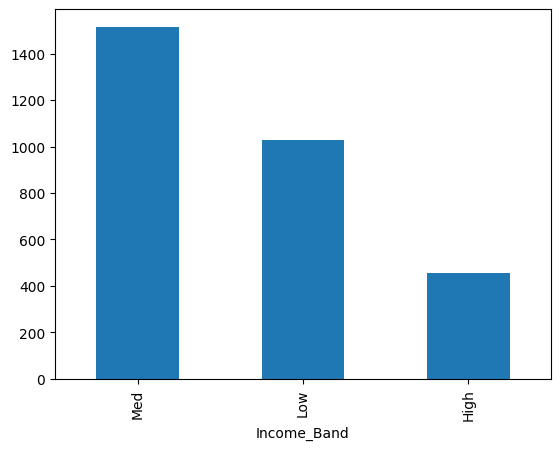

In [25]:
df['Income_Band'].value_counts().plot(kind='bar')

In [28]:
# Examine the distribution of unique categories in categorical columns

categorical_cols = df[["brid", "genderid", "iaid", "Amount of Credit Cards", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income_Band"]].columns
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())

Value counts for 'brid':


brid
3    1352
1     660
2     495
4     492
Name: count, dtype: int64

Value counts for 'genderid':


genderid
2    1511
1    1488
Name: count, dtype: int64

Value counts for 'iaid':


iaid
1     177
2     177
3     177
4     177
9     176
8     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1921
2     765
3     313
Name: count, dtype: int64

Value counts for 'Fee Structure':


Fee Structure
High    1476
Mid      961
Low      562
Name: count, dtype: int64

Value counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       766
Gold         585
Platinum     317
Name: count, dtype: int64

Value counts for 'Properties Owned':


Properties Owned
1    776
2    776
3    742
0    705
Name: count, dtype: int64

Value counts for 'Risk Weighting':


Risk Weighting
2    1221
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value counts for 'Income_Band':


Income_Band
Med     1516
Low     1027
High     456
Name: count, dtype: int64

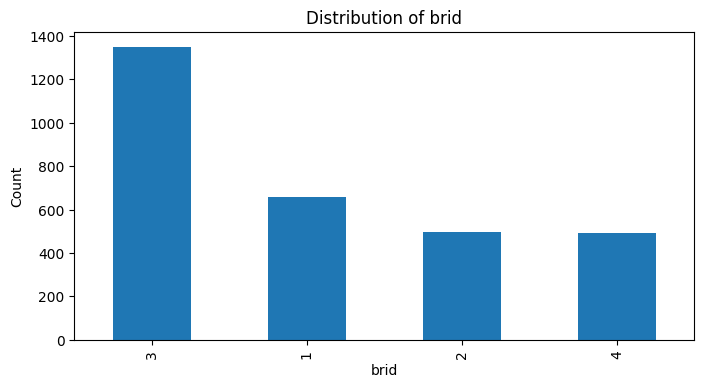

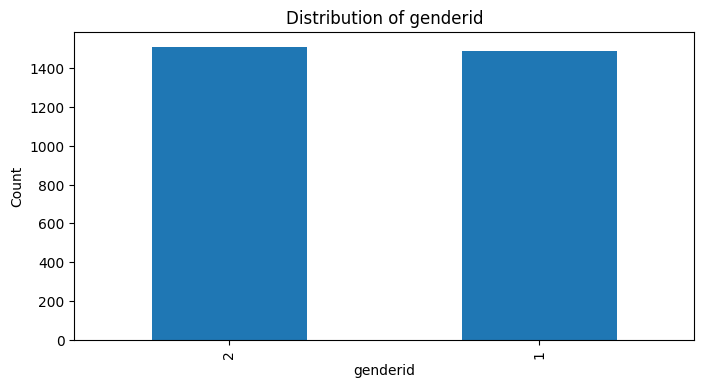

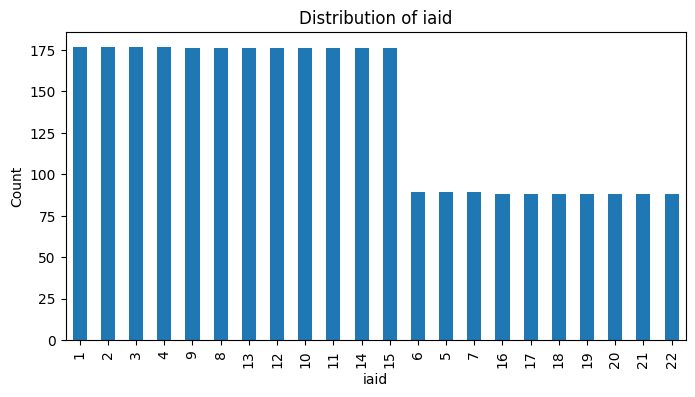

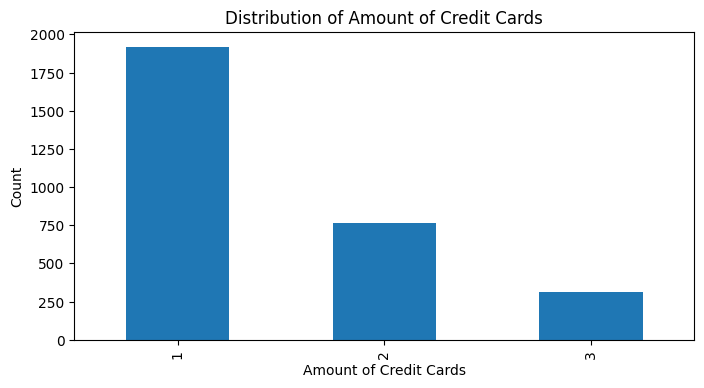

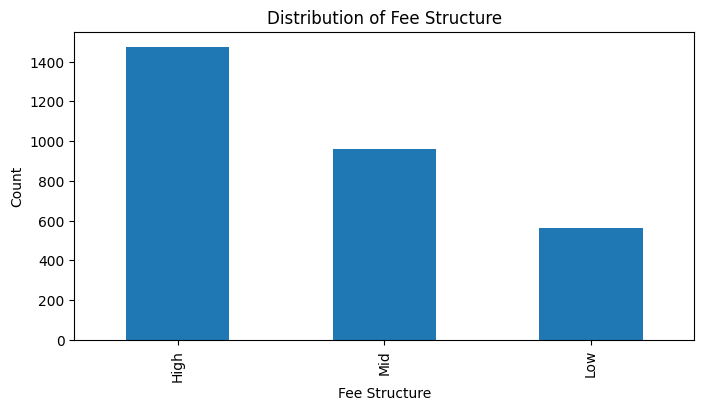

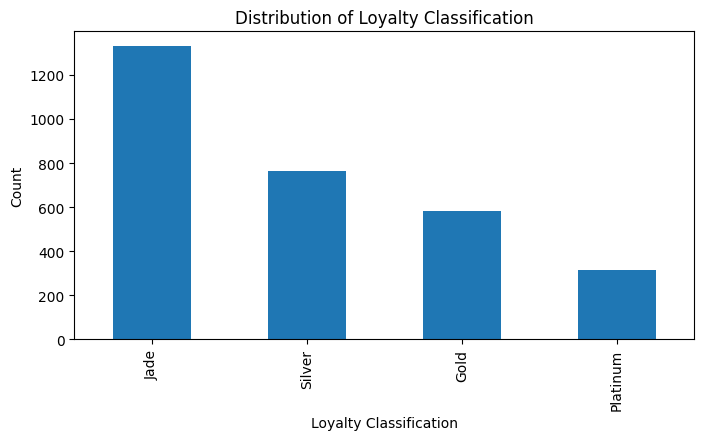

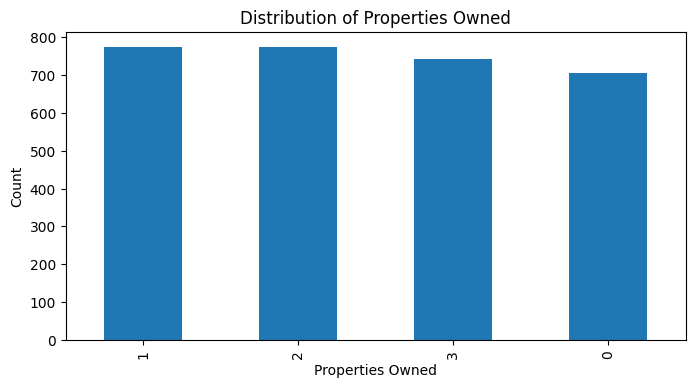

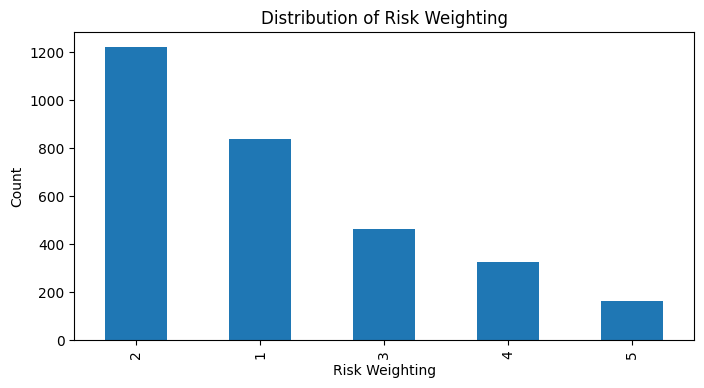

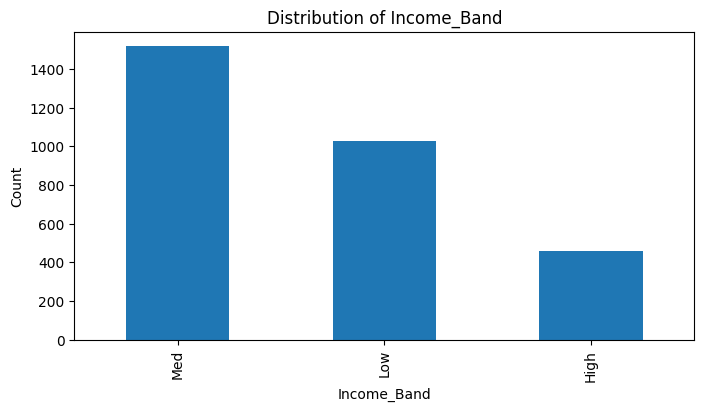

In [31]:
# Bar chart or Distribution for each categorical column

# UNIVARIATE ANALYSIS 
#(Univariate analysis is the analysis of one variable at a time to understand its distribution, 
#central tendency (mean/median/mode), and spread (range/variance/SD). It describes what the data looks like on its own.)
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

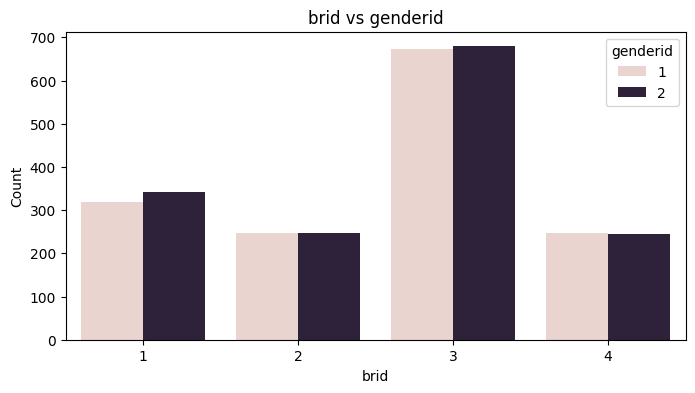

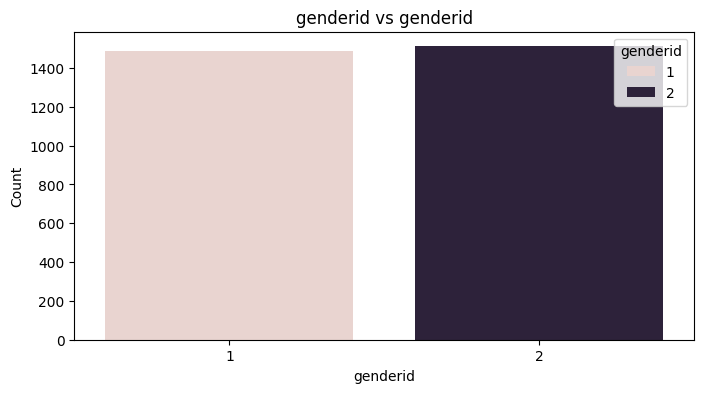

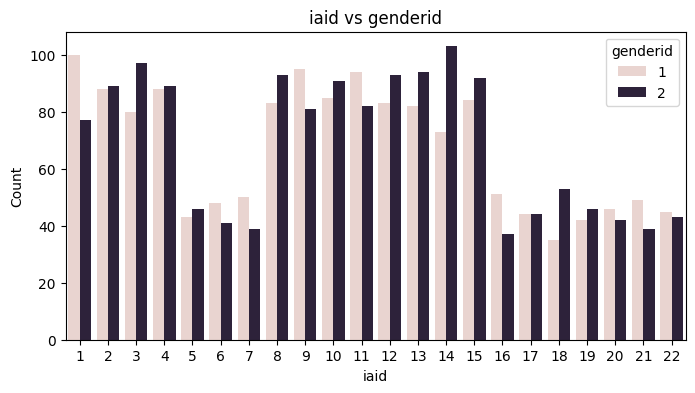

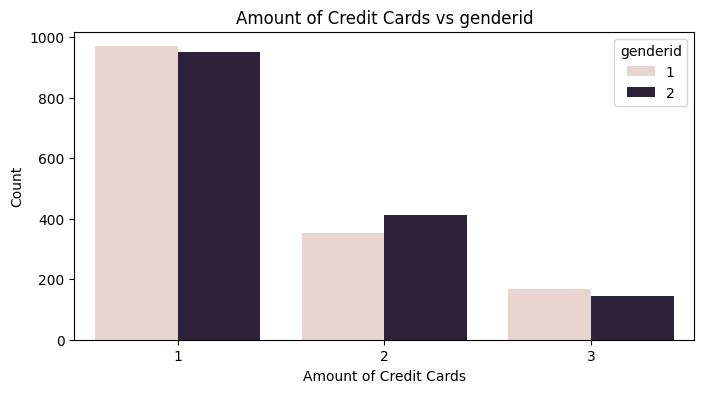

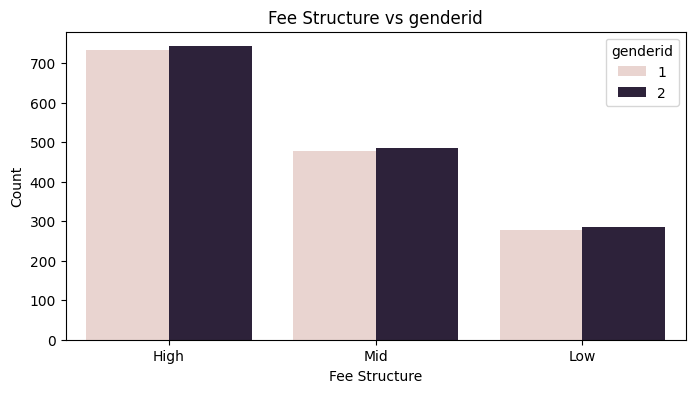

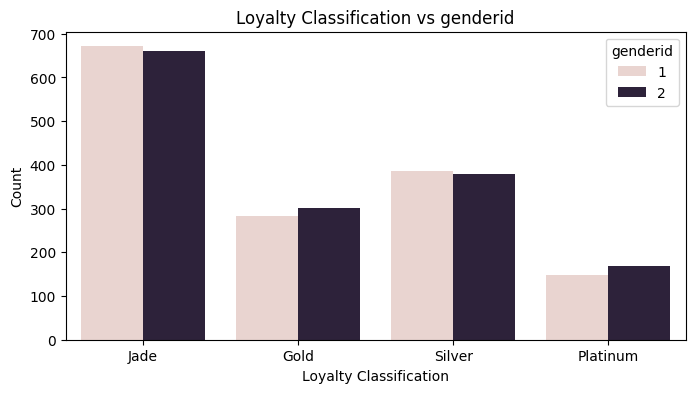

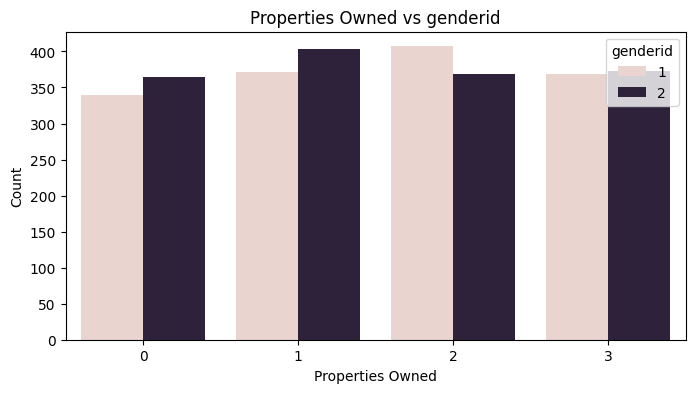

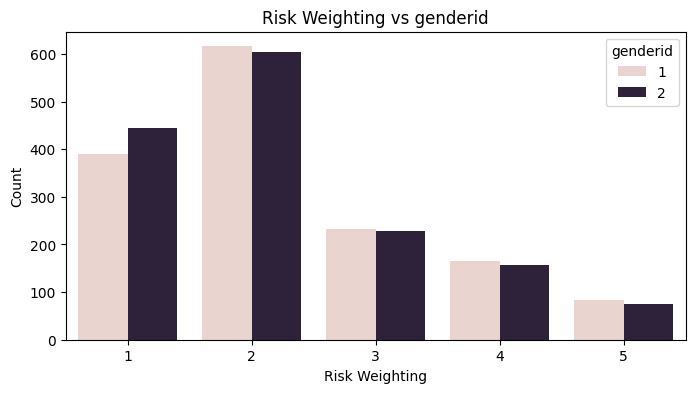

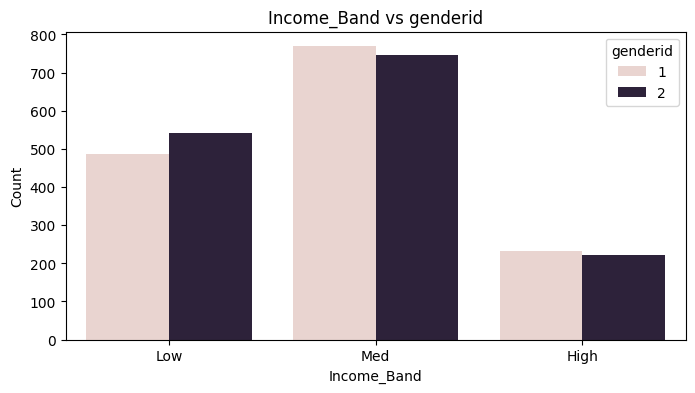

In [34]:
# BIVARIATE ANALYSIS
#Bivariate analysis is the analysis of two variables together to understand the relationship between them
#— for example, correlation between height and weight or sales and advertising spend.

df['Gender'] = df['genderid'].map({1: 'Male', 2: 'Female'})

target = "genderid"  # ← Replace this

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Bivariate analysis done based on Gender vs other variables

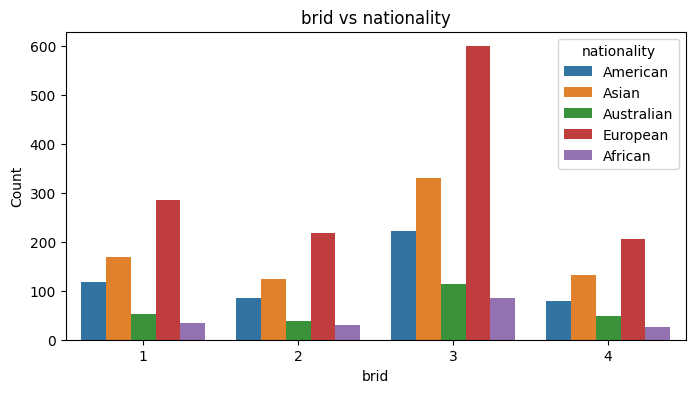

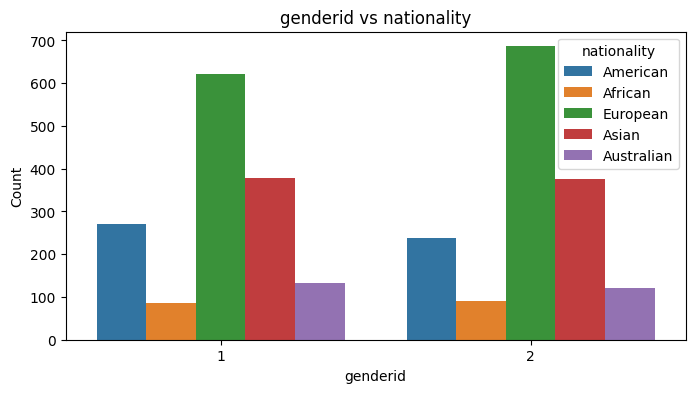

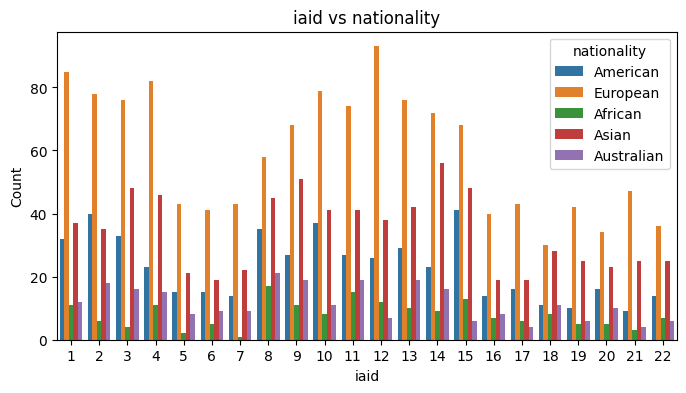

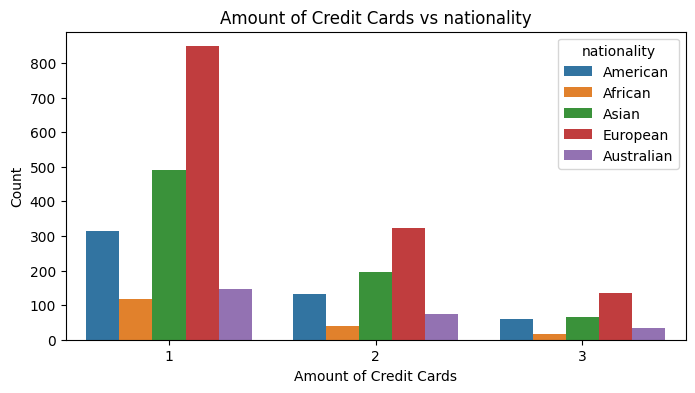

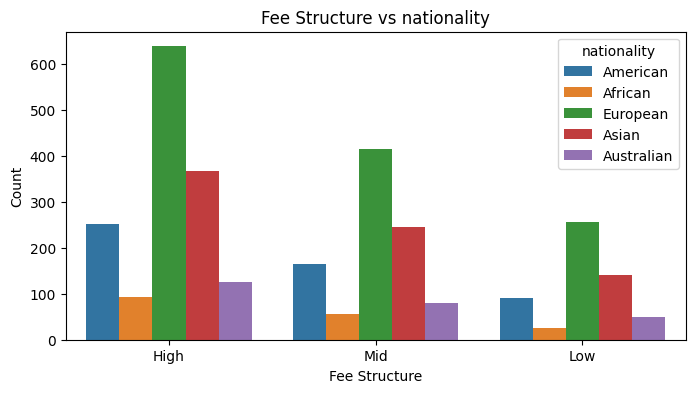

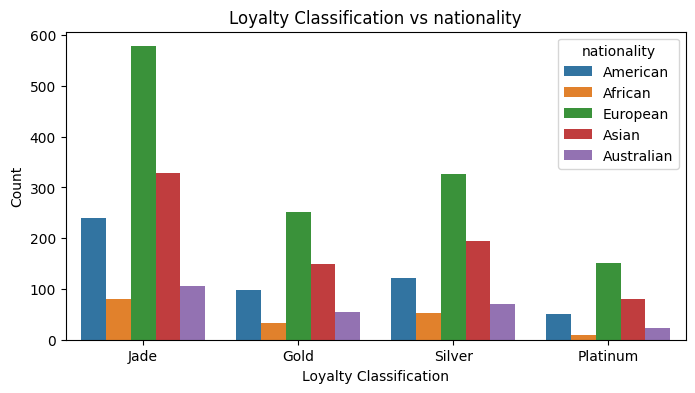

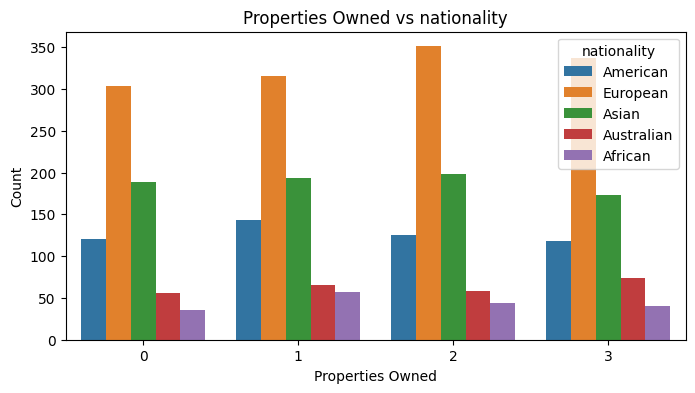

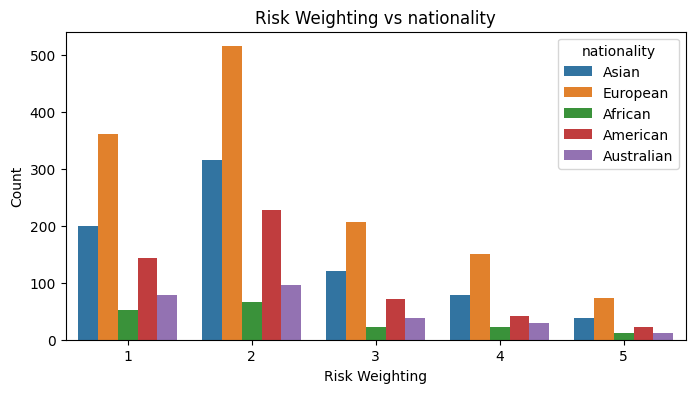

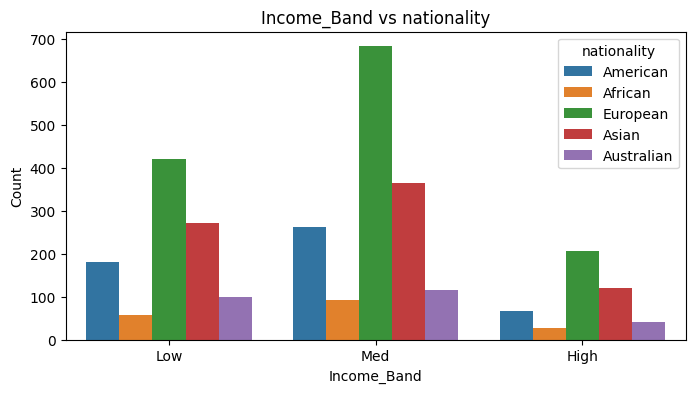

In [36]:
# BIVARIATE ANALYSIS
#Bivariate analysis is the analysis of two variables together to understand the relationship between them
#— for example, correlation between height and weight or sales and advertising spend.

df['Gender'] = df['genderid'].map({1: 'Male', 2: 'Female'})

target = "nationality"  # ← Replace this

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Bivariate analysis done based on nationality vs other variables

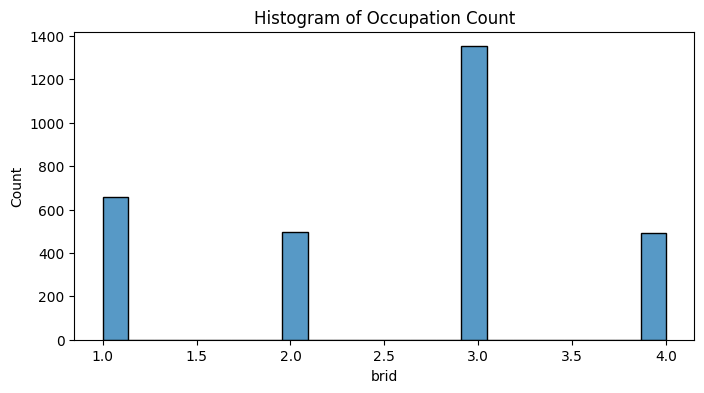

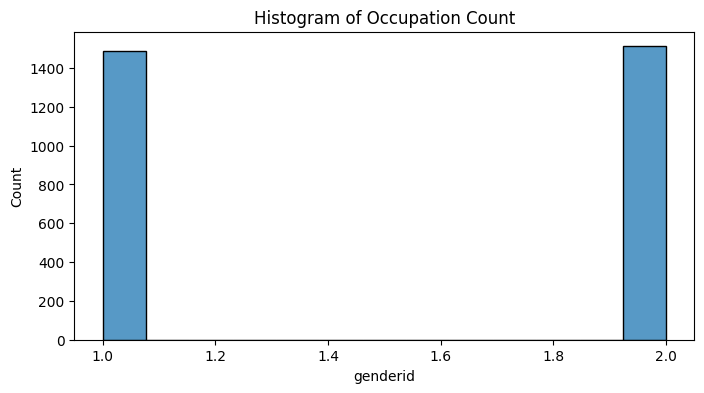

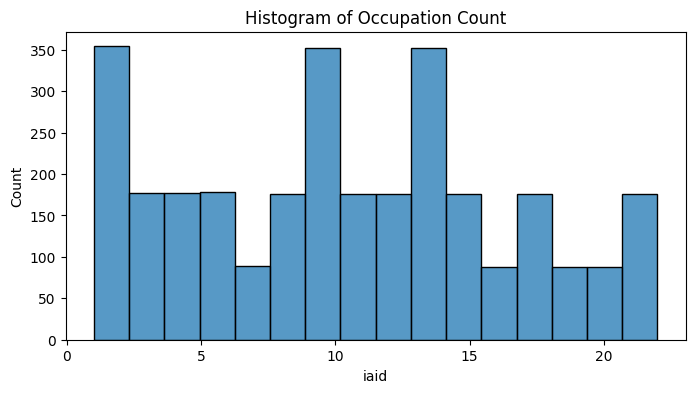

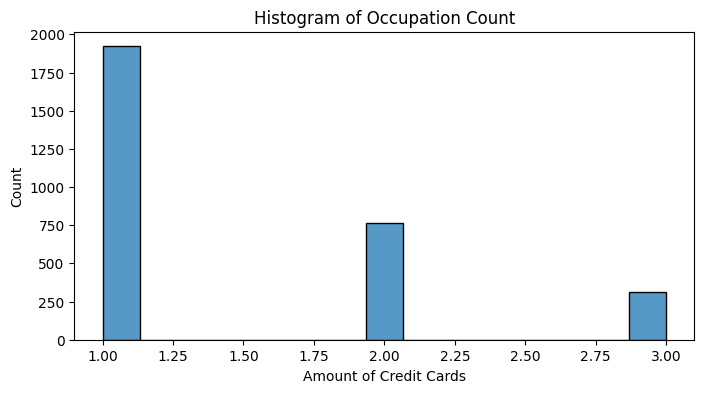

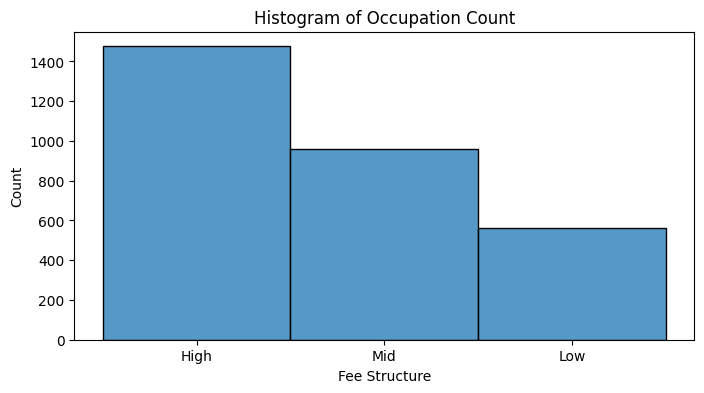

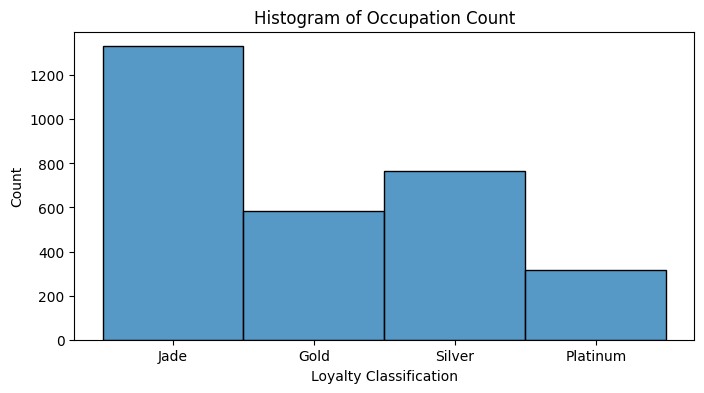

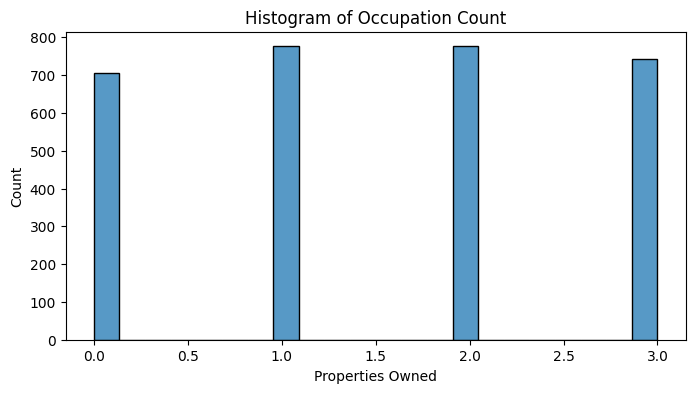

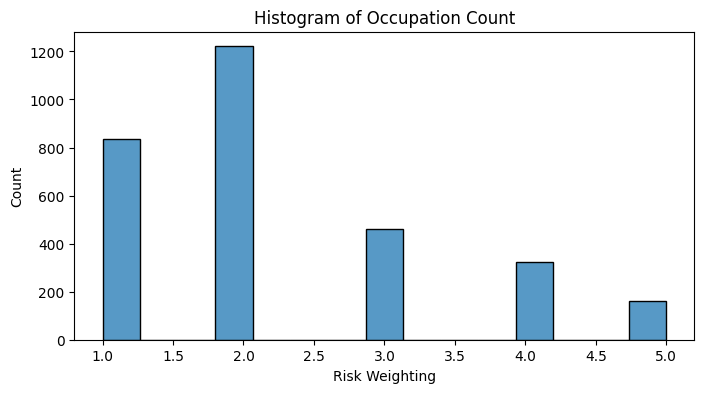

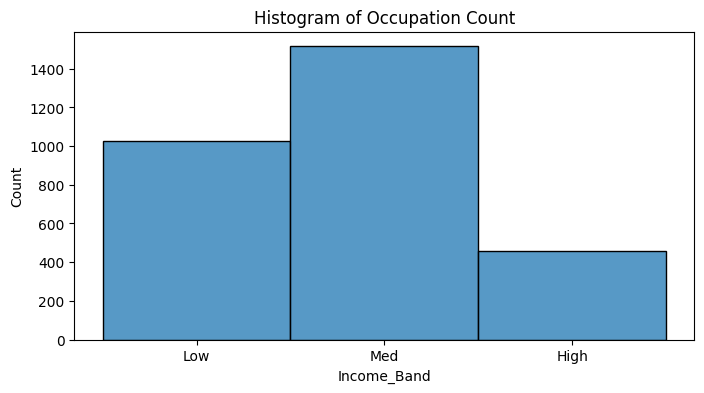

In [42]:
df['occupation'].value_counts()

for col in categorical_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [39]:
df.head(5)

,Client ID,name,age,Location ID,Joined Bank,Banking Contact,nationality,occupation,Fee Structure,Loyalty Classification,...,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,brid,genderid,iaid,Income_Band,Gender
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,607332.46,12249.96,1134475.30,1,2,1,1,1,Low,Male
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,344635.16,61162.31,2000526.10,1,3,2,1,2,Med,Male
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,203054.35,79071.78,548137.58,1,3,3,2,3,Med,Female
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,234685.02,57513.65,1148402.29,0,4,4,1,4,High,Male
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,128351.45,30012.14,1674412.12,0,3,1,2,5,Med,Female


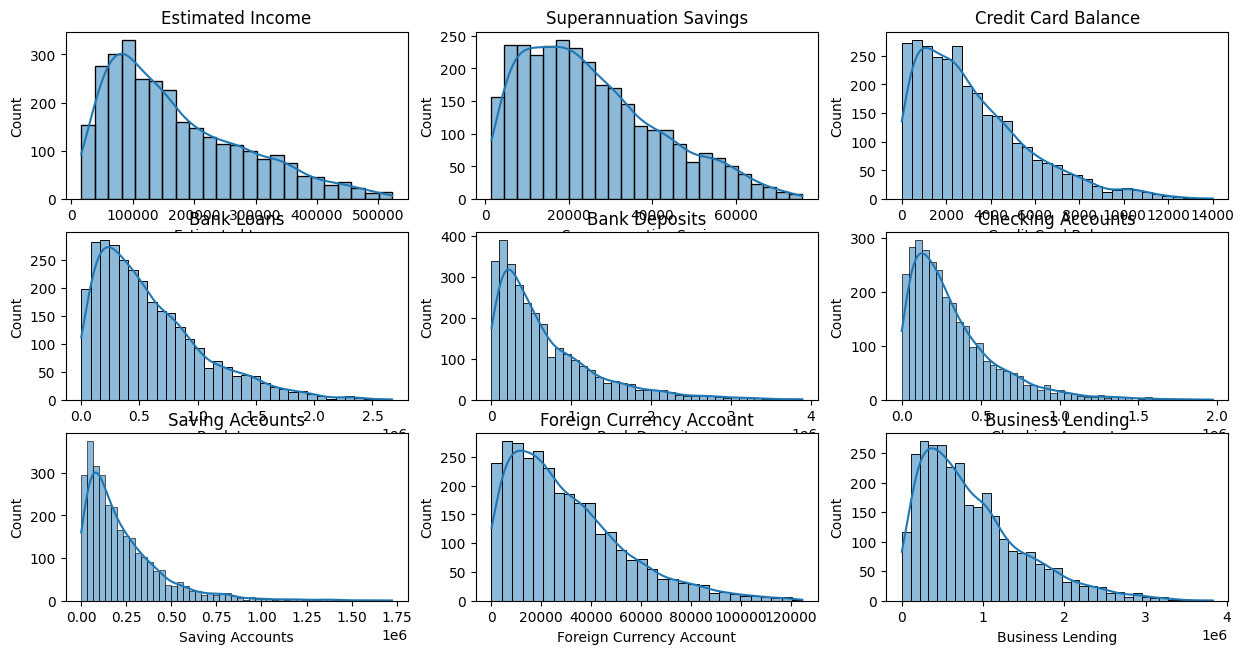

In [43]:
# Numerical Analysis

numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

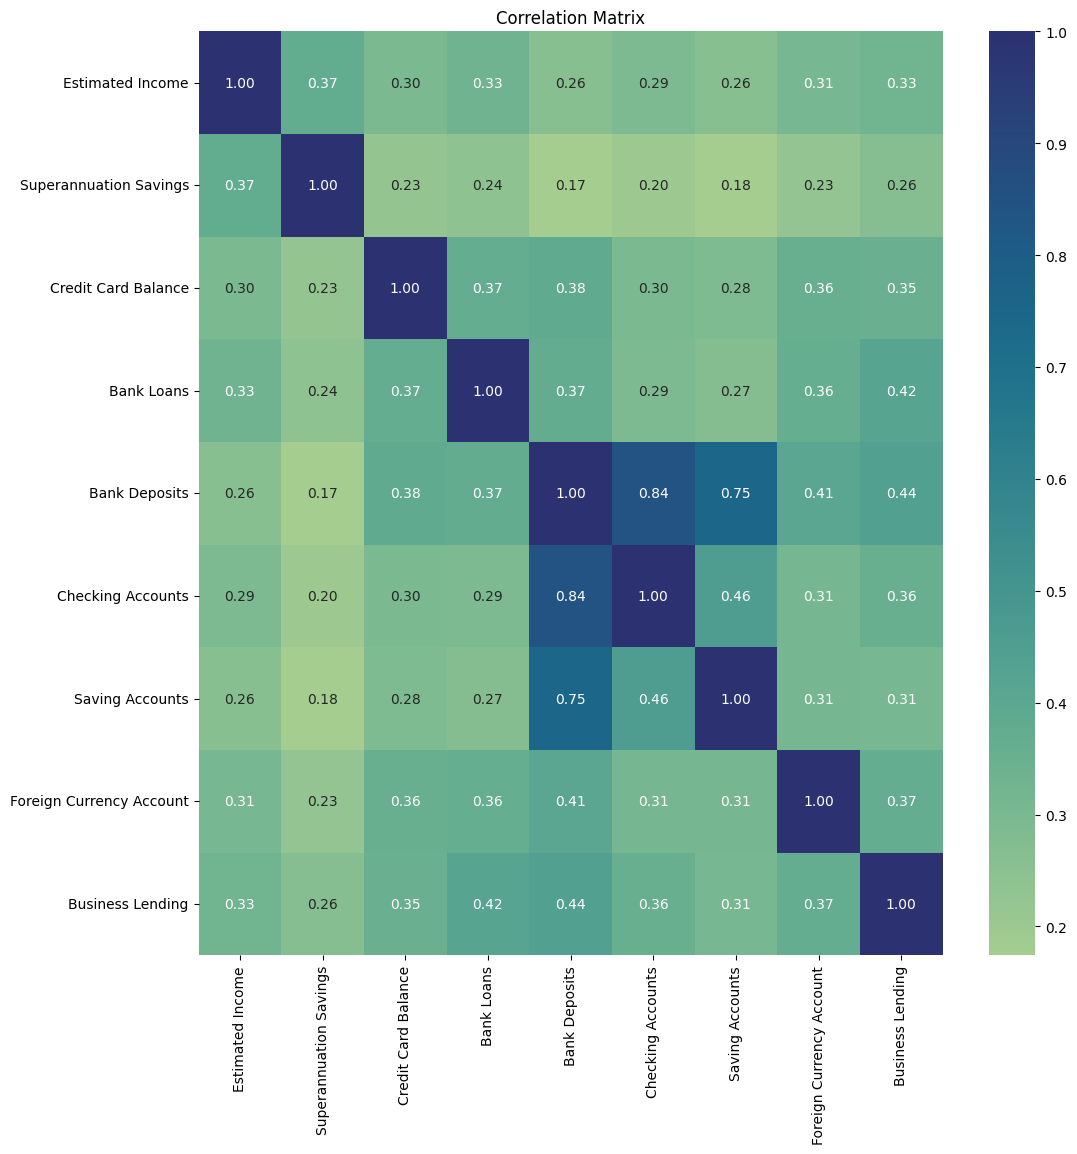

In [46]:
# Heatmap

numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot=True,cmap='crest',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [48]:
# Insights from above scatter

'''

Here are the top 5 insights:

1. Bank Deposits and Checking Accounts are highly correlated (0.84)

Reason: High-value customers keep large balances in both accounts.

2. Savings Accounts and Bank Deposits show strong correlation (0.75)

Reason: Customers with higher deposits also maintain higher savings.

3. Business Lending and Bank Loans correlate moderately (0.42)

Reason: Customers who take one type of loan often take another.

4. Estimated Income shows moderate positive correlation with most financial products (0.26–0.33)

Reason: Higher-income customers engage more across banking services.

5. No negative or zero correlations across features

Reason: Financial product usage tends to increase together—active customers use multiple products.'''

'\n\nHere are the top 5 insights:\n\n1. Bank Deposits and Checking Accounts are highly correlated (0.84)\n\nReason: High-value customers keep large balances in both accounts.\n\n2. Savings Accounts and Bank Deposits show strong correlation (0.75)\n\nReason: Customers with higher deposits also maintain higher savings.\n\n3. Business Lending and Bank Loans correlate moderately (0.42)\n\nReason: Customers who take one type of loan often take another.\n\n4. Estimated Income shows moderate positive correlation with most financial products (0.26–0.33)\n\nReason: Higher-income customers engage more across banking services.\n\n5. No negative or zero correlations across features\n\nReason: Financial product usage tends to increase together—active customers use multiple products.'